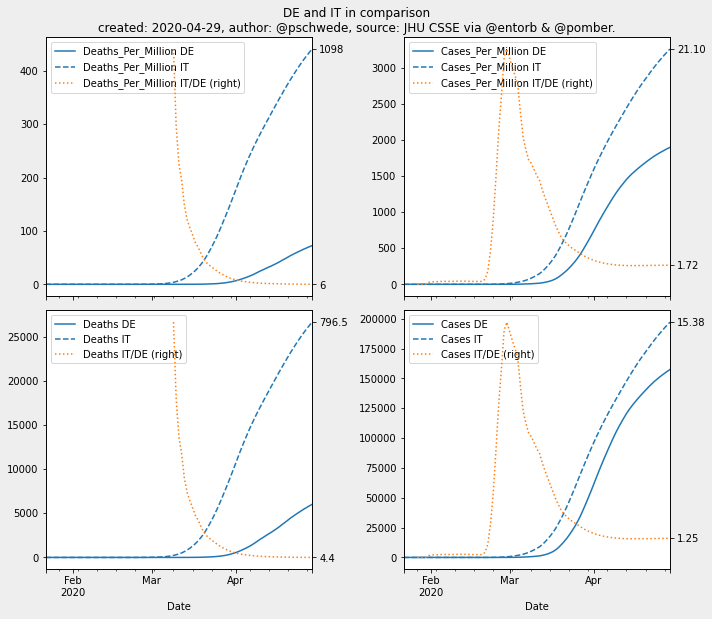

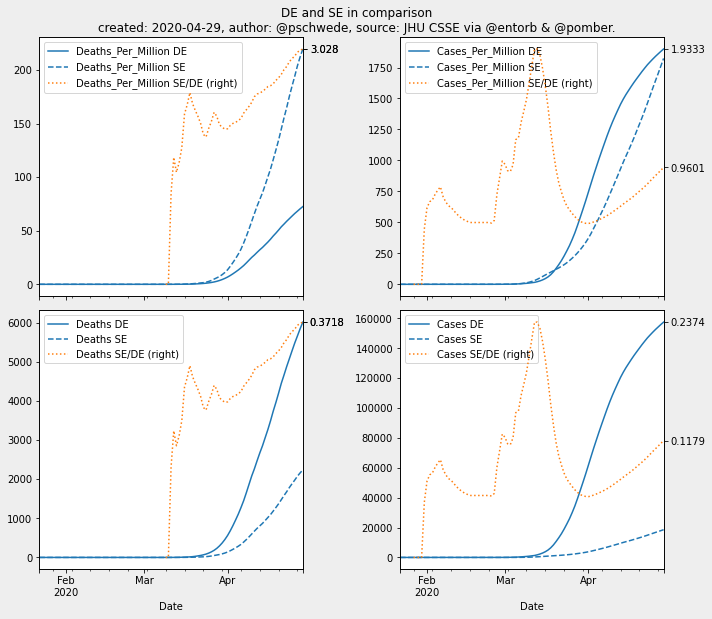

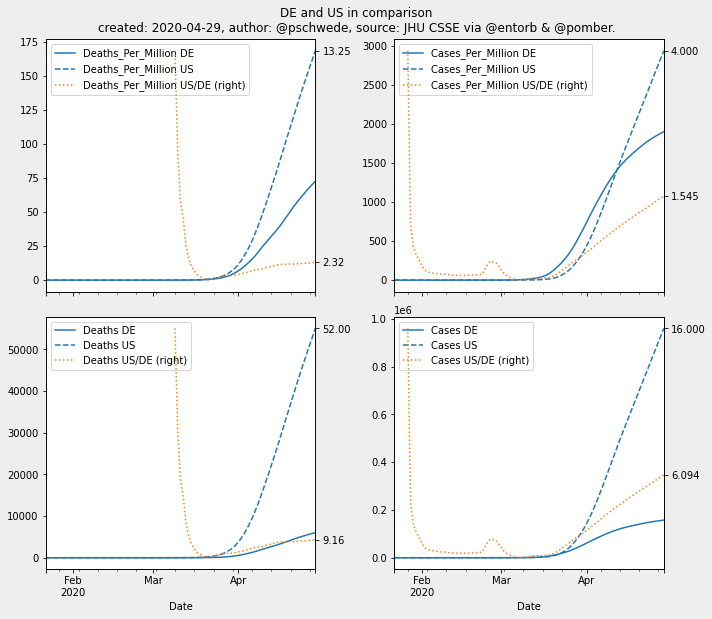

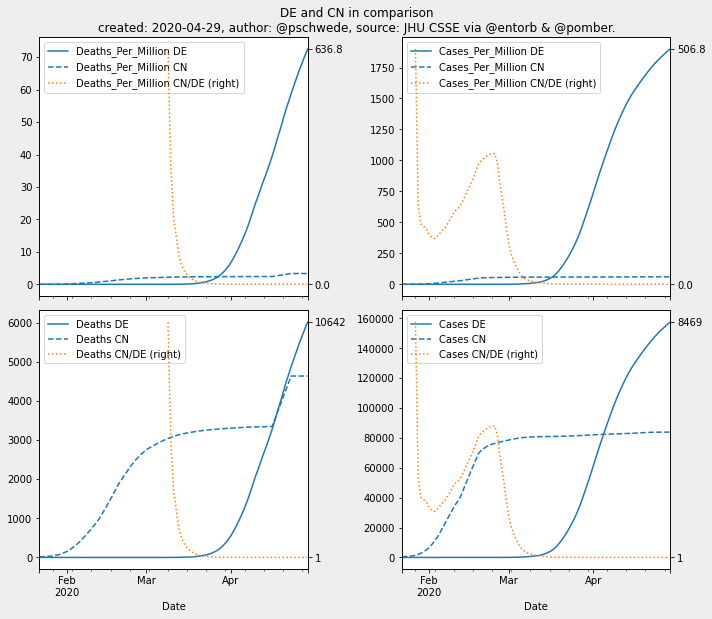

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scrape import entorb

fst = 'DE'
for snd in ['IT', 'SE', 'US', 'CN']:
  de = entorb.to_dataframe(nation=fst).rolling('7D').mean()
  se = entorb.to_dataframe(nation=snd).rolling('7D').mean()
  df = se / de

  fig, axes = plt.subplots(ncols=2, nrows=2)
  for ax, to_compare in zip(axes.flat, ['Deaths_Per_Million',
                                        'Cases_Per_Million',
                                        'Deaths',
                                        'Cases']):
    de[to_compare].plot(ax=ax, label="%s %s" % (to_compare, fst))
    se[to_compare].plot(ax=ax, label="%s %s" % (to_compare, snd),
                        linestyle='--', color=ax.lines[-1].get_color())
    ax2 = df[to_compare].plot(ax=ax,
                              label="%s %s/DE (right)" % (to_compare, snd), 
                              secondary_y=True,
                              linestyle=':' )
    ax2.set_yticks([df[to_compare][df.index.max()], df[to_compare].replace(np.inf, np.nan).max()])
    ax.legend(handles=ax.lines + ax2.lines, loc='upper left')
  fig.set_size_inches(10,9)
  fig.suptitle(("%s and %s in comparison\n"
                "created: 2020-04-29, "
                "author: @pschwede, "
                "source: JHU CSSE via @entorb & @pomber.") % (fst, snd))
  fig.set_facecolor('#EEE')
  fig.tight_layout(rect=(0, 0.03, 1, 0.95))